In [83]:
# https://anaconda.org/milesgranger/gap-statistic/notebook
# https://github.com/milesgranger/gap_statistic
import pandas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Get Data, ignore first column
data = pandas.read_csv('data.csv').iloc[:, 1:]

MELANOMA
NSCLC
(6830, 64)


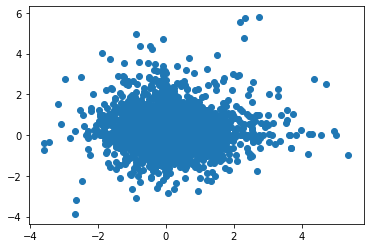

In [90]:
# Each row should represent a gene, each column represents a human tumor

# Last column is the labels
labels = data["labs"]

feature1_val =60
feature2_val = 30

print(labels[feature1_val])
print(labels[feature2_val])

data_vals = data.drop(labels="labs", axis=1)
data_fix = data_vals.T
print(data_fix.shape)
# Try to plot 2 features
plt.scatter(data_fix.iloc[:,feature1_val], data_fix.iloc[:,feature2_val])

In [85]:

# https://anaconda.org/milesgranger/gap-statistic/notebook
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [97]:
k, gapdf = optimalK(data_fix.to_numpy(), nrefs=5, maxClusters=15)
print(k)

14


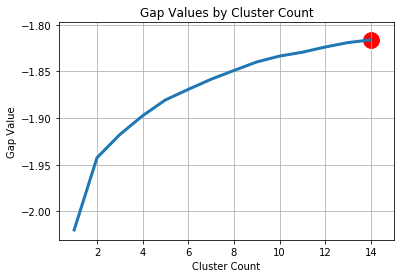

In [98]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

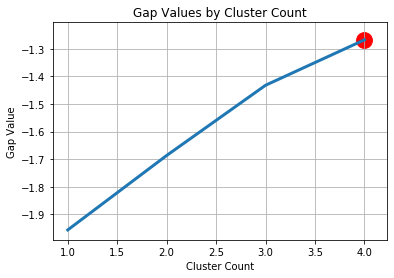

In [99]:
km = KMeans(k)
km.fit(data_fix)
num, gapdf = optimalK(km.cluster_centers_, maxClusters=5)
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == num].clusterCount, gapdf[gapdf.clusterCount == num].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()